In [ ]:
"""Simple tutorial for using TensorFlow to compute polynomial regression.

Parag K. Mital, Jan. 2016"""

In [1]:
# %% imports
%matplotlib notebook
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [12]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
config = tf.ConfigProto(gpu_options=gpu_options)

<IPython.core.display.Javascript object>


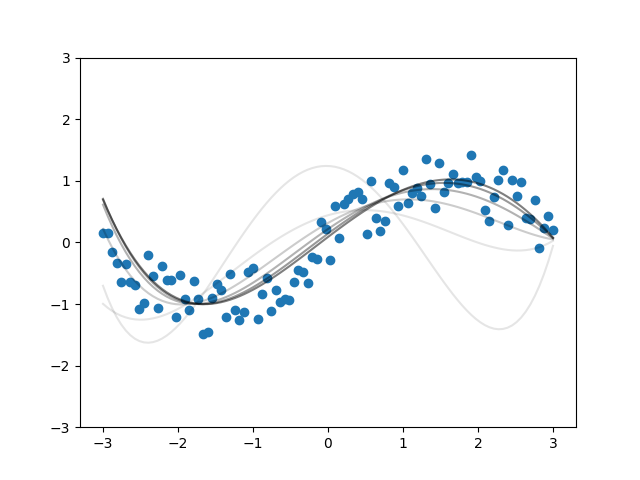

In [2]:
# %% Let's create some toy data
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

In [3]:
# %% tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [4]:
# %% Instead of a single factor and a bias, we'll create a polynomial function
# of different polynomial degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 5):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

In [5]:
# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)

In [ ]:
# %% if we wanted to add regularization, we could add other terms to the cost,
# e.g. ridge regression has a parameter controlling the amount of shrinkage
# over the norm of activations. the larger the shrinkage, the more robust
# to collinearity.
# cost = tf.add(cost, tf.mul(1e-6, tf.global_norm([W])))

In [6]:
# %% Use gradient descent to optimize W,b
# Performs a single step in the negative gradient
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
# %% We create a session to use the graph
n_epochs = 1000
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    init = tf.global_variables_initializer()
    sess.run(init)

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        if epoch_i % 10 == 0:
            training_cost = sess.run(
                cost, feed_dict={X: xs, Y: ys})
            print(training_cost)

        if epoch_i % 100 == 0:
            ax.plot(xs, Y_pred.eval(
                feed_dict={X: xs}, session=sess),
                    'k', alpha=(epoch_i + 1.) / n_epochs)
            fig.canvas.draw()
            # fig.show()
            # plt.draw()

        # Allow the training to quit if we've reached a minimum
        if epoch_i >= 500 and np.abs(prev_training_cost - training_cost) < 0.000001:
            print("breaking", np.abs(prev_training_cost - training_cost))
            break
        prev_training_cost = training_cost
ax.set_ylim([-3, 3])
fig.canvas.draw()
# plt.waitforbuttonpress()

85.3951
2.05915
1.68605
1.38709
1.15806
0.978088
0.83377
0.716259
0.619497
0.539187
0.472164
0.416026
0.368892
0.329264
0.29592
0.267854
0.244228
0.224344
0.207611
0.193533
0.181691
0.17173
0.163351
0.156299
0.150362
0.145358
0.141134
0.137563
0.134538
0.131966
0.129772
0.127893
0.126275
0.124874
0.123653
0.122581
0.121632
0.120786
0.120026
0.119336
0.118705
0.118123
0.117582
0.117076
0.1166
0.116149
0.115721
0.115311
0.114918
0.114542
0.114178
('breaking', 0.0)
